In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render li, div.text_cell_render p, code{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

<font size="6" color="red"><b>ch3. 분류분석</b></font>
# 1절. 분류분석 개요
## 1-1 분류분석이란?
    * 타겟변수가 categorical 변수인 분석
        - 수업ex. mnist 숫자예측, iris 분류예측, 와인등급예측, 질병예측
        - ex. 고객등급예측, 휴면고객예측, 상품구매예측, 보험사기예측...
    * sklearn 패키지 : 예제데이터셋, 전처리, 머신러닝 모형
## 1-2 샘플용 데이터 셋 접근
### load 계열(패키지 내에 데이터 있음)
    - load_iris(), load_boston(), load_diabets(), ...
### fetch 계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)
    - fetch_openml(), fetch_rov1(로이터 뉴스 말뭉치)
    
### make 계열(가상의 데이터 생성)
    - make_classification() : 분류분석용 데이터 생성
    - make_regression() : 회귀분석용 데이터 생성
    - make_blobs() : 군집분석용 데이터 생성(타겟변수x)

In [3]:
# load 계열
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

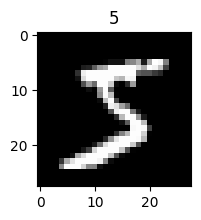

In [4]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [8]:
# fetch 계열
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name="mnist_784", 
                     version=1,
                     as_frame=False, # 데이터프레임으로 받을 지 여부(False:넘파이 배열)
                     parser="auto")
X, y = mnist.data, mnist.target.astype('int')
X.shape, y.shape

((70000, 784), (70000,))

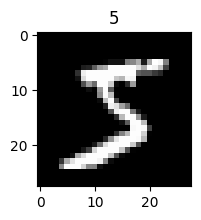

In [9]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.title(y[0])
plt.show()

# 2절. 분류모형의 종류
- predict()

## 2-1 확률적 모형
    - 주어진 데이터에 각 클래스가 정답일 확률을 계산하는 모형
    - predict_proba() : 각 분류 클래스별 확률을 알려줌(일부 판별함수 모형에 있기는 함)
    - predict_log_proba() : 확률의 로그값을 알려줌
### 1) 확률적 생성 모형
    - 각 클래스별 특징 데이터 확률분포 추정하는 방식. 소량의 데이터로도 작동
    - ex. QuadraticDiscriminantAnalysis, MultinomialNB

### 2) 확률적 판별 모형
    - 확률을 계산하는 함수 이용
    - ex. 의사결정나무, 로지스틱 회귀

## 2-2 판별함수 모형
    - 주어진 데이터를 클래스에 따라 다른 영역으로 나누는 경계면을 찾은 후, 
    - 이 경계면을 계산 식 => 판별함수
    - decision_function()
    - ex 퍼셉트론, SVM, MLP(신경망)
=> RandomForest, LGBM, XGBoost, CatBoost 등의 앙상블 모형이 더 많이 쓰임

# 3절. 모형1;확률적 생성 모형
- 베이즈 정리를 사용하여 확률분포 계산
## 3-1 QDA
- x가 연속형(실수)이면 정규분포라고 가정함

In [10]:
# 샘플 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, # 독립변수 갯수
                          n_informative=2, # 타겟변수에 영향주는 독립 변수 갯수
                          n_redundant=0, # 타겟변수에 영향을 주지 않는 독립 변수 갯수
                          n_clusters_per_class=1, # 클래스 내 서브그룹수
                          n_classes=2,   # 타겟변수의 class 수
                          n_samples=100, # 데이터 갯수(행수)  100이 기본값
                          random_state=9) # seed값
X.shape, y.shape

((100, 2), (100,))

In [12]:
import numpy as np
np.unique(y)

array([0, 1])

In [13]:
# 타겟변수의 클래스 균형
import pandas as pd
pd.Series(y).value_counts()

0    50
1    50
dtype: int64

In [17]:
# 타겟변수의 클래스 균형
# y=1로 분류된 데이터
X[y==1].shape, X[y==0].shape

((50, 2), (50, 2))

In [18]:
# 타겟변수의 클래스 균형
y.mean()

0.5

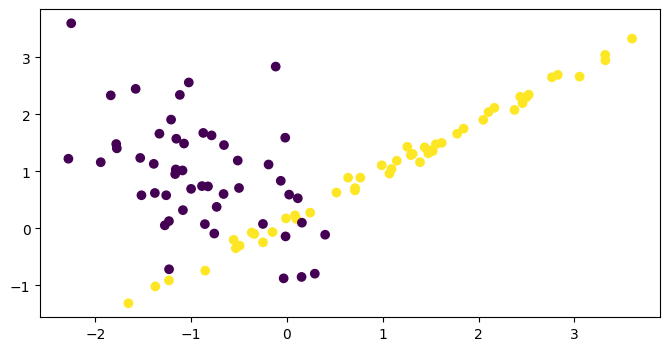

In [26]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[:, 0], y=X[:,1], c=y)

In [27]:
# (0,0) 기준으로 대칭구조
X[y==1] = -X[y==0]

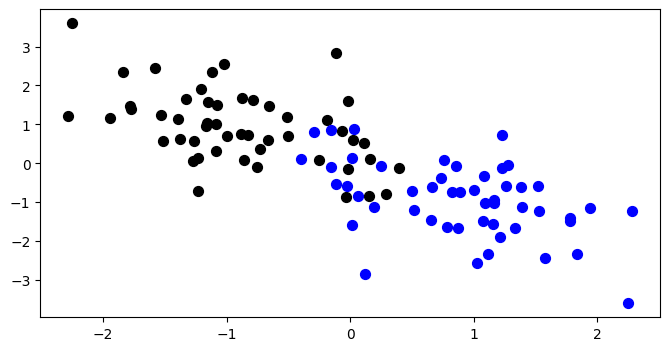

In [32]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[y==0, 0], y=X[y==0,1], c='k', s=50, edgecolors='k')
plt.scatter(x=X[y==1, 0], y=X[y==1,1], c='b', s=50)

In [33]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [37]:
x = [[0.5, 0]] # predict할 때는 2차원 데이터로
model.predict(x)

array([1])

In [38]:
model.predict_proba(x)

array([[0.16455419, 0.83544581]])

In [39]:
model.classes_ #  분류될 내용

array([0, 1])

In [40]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,1
row_0,,
0,44,6
1,6,44


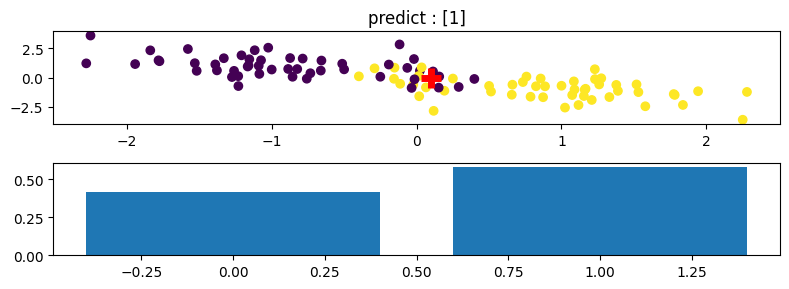

In [59]:
x = [[0.1, 0]]
plt.figure(figsize=(8,3))
p = model.predict_proba(x)
plt.subplot(211) # 2행1열로 subplot에서 첫번째 그래프
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.scatter(x=x[0][0], y=x[0][1], c='r', s=200, marker='+', lw=5)
h = model.predict(x)
plt.title(f'predict : {h}')
plt.subplot(212)
plt.bar(model.classes_, p[0])
plt.tight_layout()
plt.show()

In [49]:
model.classes_

array([0, 1])

## 3-2 나이브베이지안 모형

In [62]:
# 데이터
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
# 모형 생성/학습
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [65]:
X.loc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [ ]:
x = [[5.1, 3.5, 1.4, 0.2]]
h = model.predict(x)
p = model.predict_proba(x)
print('예측 :', h)
print(model.classes_)

In [ ]:
plt.figure(figsize=(8,3))

plt.subplot(211) # 2행1열로 subplot에서 첫번째 그래프